In [1]:
import sys
sys.path.append('../') 

import time as time

import numpy as np
import matplotlib.pyplot as plt
from datasets.real_synthetic_dataset import RealSyntheticDataset
from utils.common import load_experiment_config

In [2]:
experiment_config = "/home/diz-wsl/personal_repos/tfm/config/experiments/real_synthetic_default.yaml"
experiment_name, dataset_config, model_config, train_config = load_experiment_config(experiment_config)


In [3]:
gen_dataset = RealSyntheticDataset(config = dataset_config)
pass

Diccionario cargado desde /home/diz-wsl/personal_repos/tfm/data/ecoli_k12/pod5_1.h5
Done in 2.5963 secs


In [4]:
real_data = gen_dataset.full_dataset[0]

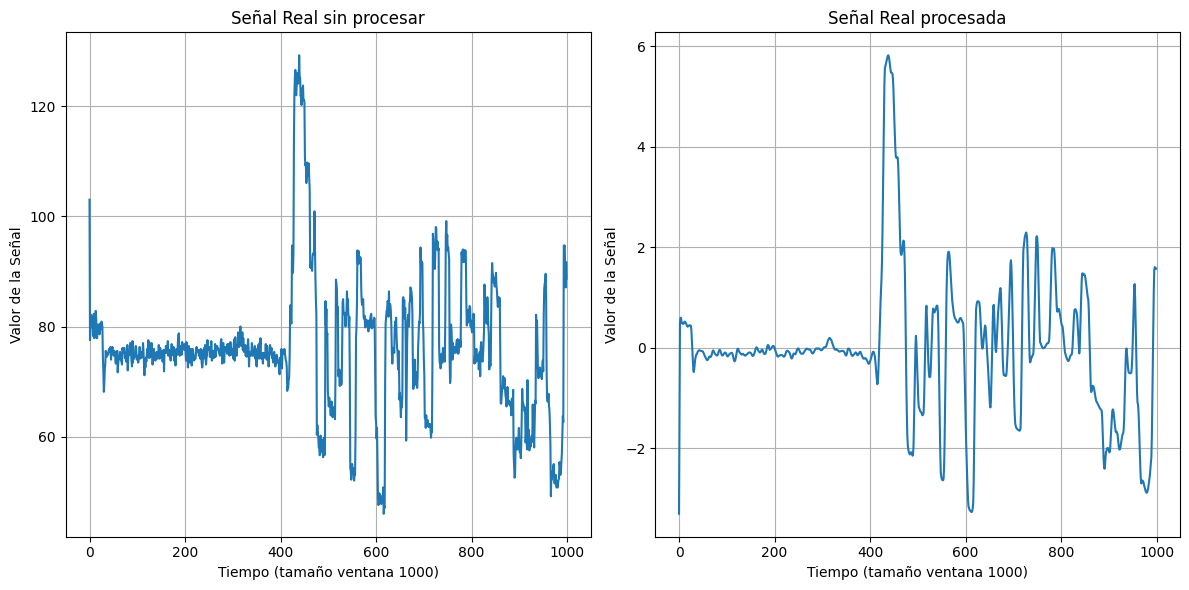

In [8]:
w_idx = 0
w_size = dataset_config["window_size"]
# Crear figura con dos subgráficos
plt.figure(figsize=(12, 6))

# Primera gráfica (señal sin procesar)
segment = [w_idx * w_size, ((w_idx * w_size)+w_size)]
plt.subplot(1, 2, 1)  # (Filas, Columnas, Índice)
plt.plot(real_data["signal_pa"][segment[0]:segment[1]])
plt.title('Señal Real sin procesar')
plt.xlabel(f'Tiempo (tamaño ventana {dataset_config["window_size"]})')
plt.ylabel('Valor de la Señal')
plt.grid(True)

# Segunda gráfica (señal procesada)
plt.subplot(1, 2, 2)
plt.plot(real_data["window_signal"][w_idx])
plt.title('Señal Real procesada')
plt.xlabel(f'Tiempo (tamaño ventana {dataset_config["window_size"]})')
plt.ylabel('Valor de la Señal')
plt.grid(True)

# Mostrar ambas gráficas
plt.tight_layout()  # Ajustar diseño para evitar superposiciones
plt.show()

In [6]:
synthetic_data = gen_dataset.full_dataset[11]

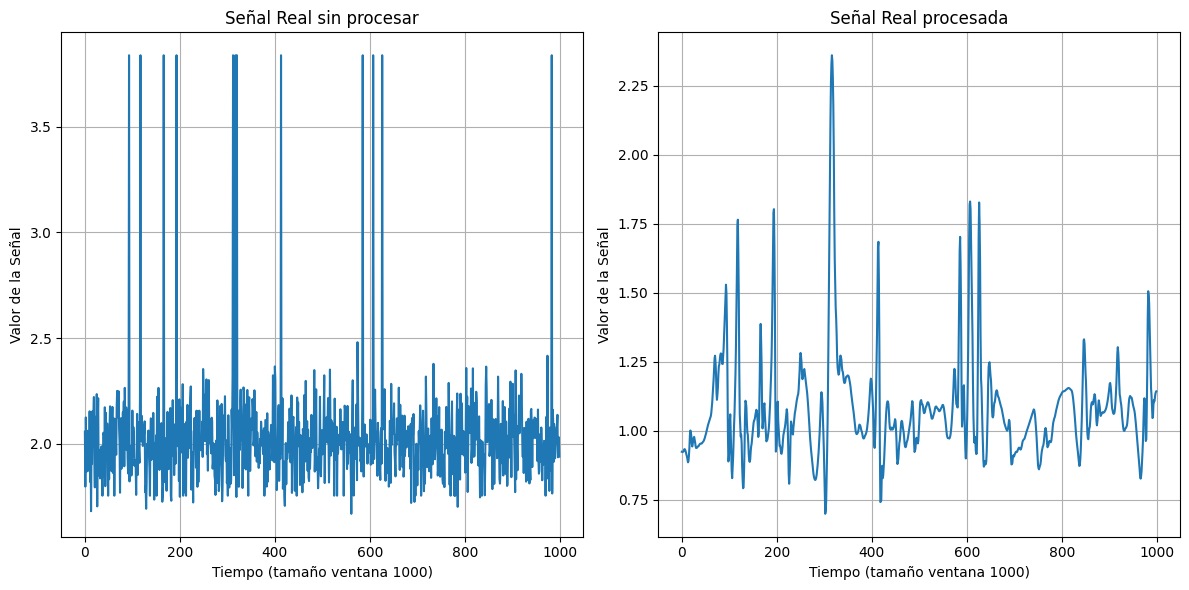

In [7]:
w_idx = 2
w_size = dataset_config["window_size"]
# Crear figura con dos subgráficos
plt.figure(figsize=(12, 6))

# Primera gráfica (señal sin procesar)
segment = [w_idx * w_size, ((w_idx * w_size)+w_size)]
plt.subplot(1, 2, 1)  # (Filas, Columnas, Índice)
plt.plot(synthetic_data["signal_pa"][segment[0]:segment[1]])
plt.title('Señal Real sin procesar')
plt.xlabel(f'Tiempo (tamaño ventana {dataset_config["window_size"]})')
plt.ylabel('Valor de la Señal')
plt.grid(True)

# Segunda gráfica (señal procesada)
plt.subplot(1, 2, 2)
plt.plot(synthetic_data["window_signal"][w_idx])
plt.title('Señal Real procesada')
plt.xlabel(f'Tiempo (tamaño ventana {dataset_config["window_size"]})')
plt.ylabel('Valor de la Señal')
plt.grid(True)

# Mostrar ambas gráficas
plt.tight_layout()  # Ajustar diseño para evitar superposiciones
plt.show()